In [1]:
!pip install sklearn --upgrade

Requirement not upgraded as not directly required: scikit-learn in c:\programdata\anaconda3\lib\site-packages (from sklearn) (0.19.1)
  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\jchugh\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from sklearn.model_selection import train_test_split

In [87]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"D:\Users\jchugh\Downloads\HW_Machine-Learning_exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [8]:
target=df[['koi_disposition']]

In [28]:
target['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [35]:
data=df.drop('koi_disposition', axis=1)
selected_features =data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [38]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
print (X_train_scaled.shape, y_train.shape)
print (X_test_scaled.shape, y_test.shape)

(5243, 40) (5243, 1)
(1748, 40) (1748, 1)


In [83]:
from sklearn.ensemble import RandomForestClassifier as Model
model=Model(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train.values.ravel())
model.score(X_test_scaled, y_test)
model.predict(X_test_scaled)

array(['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'CANDIDATE', 'CONFIRMED'], dtype=object)

In [85]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [110]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(Model(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 76.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [112]:
print(bestF.best_params_)
print(bestF.best_score_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8949074957085638


In [114]:
predictions = bestF.predict(X_test_scaled)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.75      0.80       411
     CONFIRMED       0.83      0.87      0.85       484
FALSE POSITIVE       0.97      1.00      0.98       853

   avg / total       0.90      0.90      0.90      1748



In [119]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predictions) 
print(results) 

[[309  82  20]
 [ 54 421   9]
 [  2   2 849]]


In [75]:
sorted(zip(model.feature_importances_, selected_features), reverse=True)

[(0.10568902328175549, 'koi_fpflag_co'),
 (0.0999672360190267, 'koi_fpflag_nt'),
 (0.07389193344995154, 'koi_fpflag_ss'),
 (0.05542657734206979, 'koi_model_snr'),
 (0.04480948636313408, 'koi_prad'),
 (0.0365164614629224, 'koi_fpflag_ec'),
 (0.03599179304915175, 'koi_duration_err1'),
 (0.03320021390273367, 'koi_steff_err2'),
 (0.03186747770597045, 'koi_prad_err1'),
 (0.029981805598038657, 'koi_duration_err2'),
 (0.029705365199486265, 'koi_steff_err1'),
 (0.028698180446674836, 'koi_prad_err2'),
 (0.023751570427381817, 'koi_time0bk_err1'),
 (0.02370145973196228, 'koi_time0bk_err2'),
 (0.022905733174520854, 'koi_period'),
 (0.022336328406497262, 'koi_duration'),
 (0.020014069437314146, 'koi_depth'),
 (0.01981646136986101, 'koi_period_err1'),
 (0.019535056842409672, 'koi_impact'),
 (0.017222711537761313, 'koi_period_err2'),
 (0.016947754829050712, 'koi_insol_err1'),
 (0.016245820141641915, 'koi_teq'),
 (0.014669730798487426, 'koi_insol_err2'),
 (0.014252500223517046, 'koi_insol'),
 (0.01335

In [76]:
results=[]
for treeexp in range(9):
    trees=3**treeexp
    rf=RandomForestClassifier(n_estimators=trees)
    rf=rf.fit(X_train_scaled, y_train.values.ravel())
    score=rf.score(X_test_scaled, y_test)
    results.append({'score':score,'trees':trees})

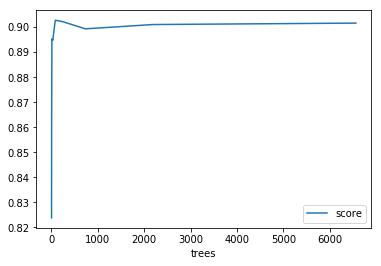

In [77]:
pd.DataFrame(results).plot('trees', 'score')

In [71]:
score

0.9010297482837528